# Introducción a la generación de gráficos en R


`ggplot2` es un paquete de R basado en la **Gramática de Gráficos** propuesta por Leland Wilkinson. Permite construir gráficos mediante la combinación de capas, donde cada capa añade información o características al gráfico final:

1. **Datos (`data`)**
   - El conjunto de datos que se visualiza, generalmente en formato largo (long).

2. **Mapeo de estéticas (`aes`)**
   - Relaciona variables de los datos con características visuales.
   - Ejemplo: `x`, `y`, `tipo_1`, `tipo_2` a color, tamaño: `aes(x, y, color = tipo_1, size = tipo_2)`

3. **Geometrías (geoms)**

    - Define cómo se representan los datos visualmente (puntos, líneas, barras, etc.).


| Geometría         | Uso                                      |
|-------------------|------------------------------------------|
| `geom_point()`    | Gráficos de dispersión (scatterplots).   |
| `geom_line()`     | Líneas conectando puntos.                |
| `geom_bar()`      | Diagramas de barras.                    |
| `geom_histogram()`| Histogramas.                            |
| `geom_boxplot()`  | Diagramas de caja (boxplots).            |
| `geom_density()`  | Densidad.                               |
| `geom_violin()`   | Diagramas de violín (variación de boxplot que muestra la densidad de los datos). |
| `geom_tile()`   | Gráficos de calor (heatmaps). |


4. **Escalas (scales)**

    - Controla cómo se mapean los datos a las características estéticas fuera de las escalas por defecto.

5. **Coordenadas (coords)**

    - Define el sistema de coordenadas (`coord_cartesian()`, `coord_polar()`,...)

7. **Facetas (`facets`)**

    - Divide los datos en subgráficos según una o más variables (`facet_wrap()`, `facet_grid()`,...).

8. **Temas (`themes`)**

    - Personaliza la apariencia del gráfico (`theme_minimal()`, `theme_classic()`,...).




## Ejemplos

### `geom_point()`

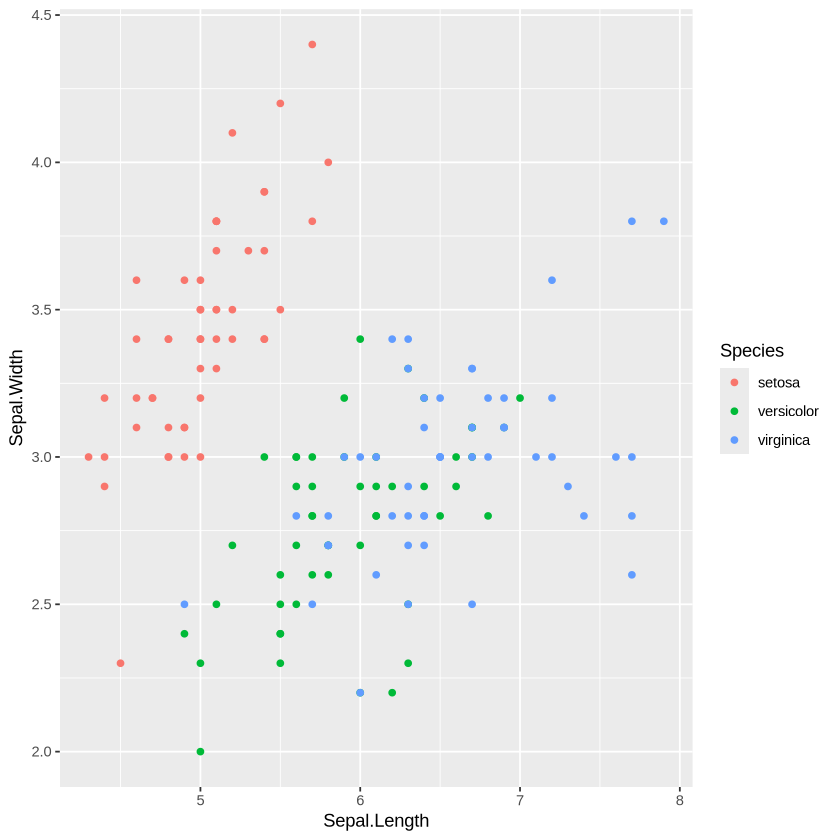

In [5]:
library("ggplot2")

# Crear un gráfico de dispersión con el dataset iris
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, color = Species)) + geom_point() +
  labs(title = "Relación entre largo y ancho del sépalo", x = "Largo del Sépalo", y = "Ancho del Sépalo", color = "Especie"
) +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


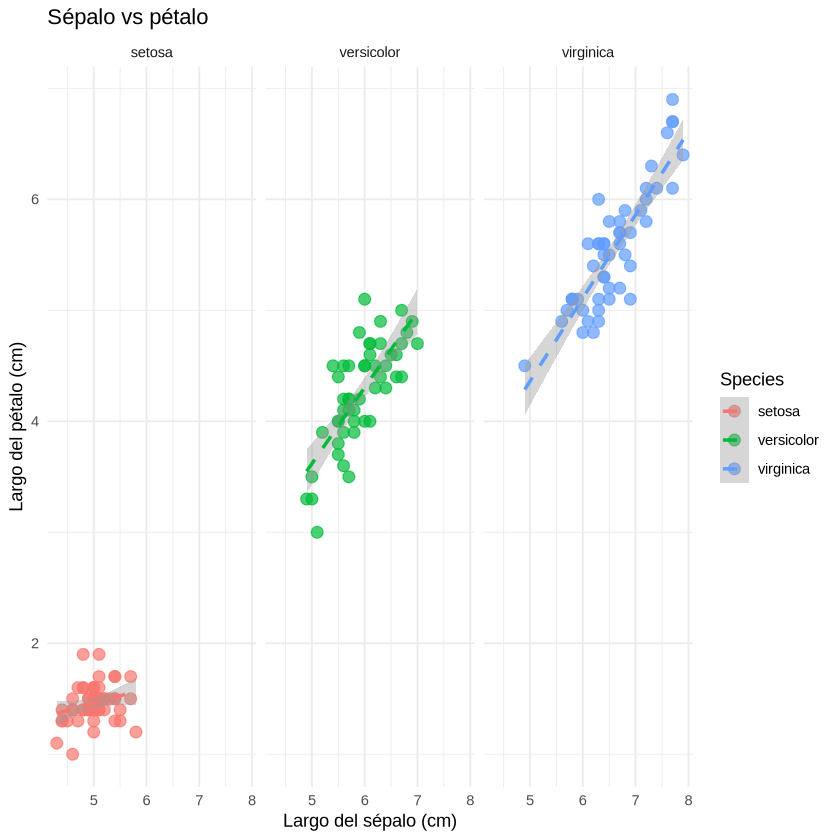

In [18]:
library(ggplot2)

# Gráfico con iris
ggplot(iris, aes(x = Sepal.Length, y = Petal.Length, color = Species)) +
  geom_point(alpha = 0.7, size = 3) + 
  geom_smooth(method = "lm", se = TRUE, linetype = "dashed") +
  facet_wrap(~Species) +  # Facetas por especie
  labs(
    title = "Relación entre sépalo y pétalo por especie",
    x = "Largo del sépalo (cm)",
    y = "Largo del pétalo (cm)"
  ) +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


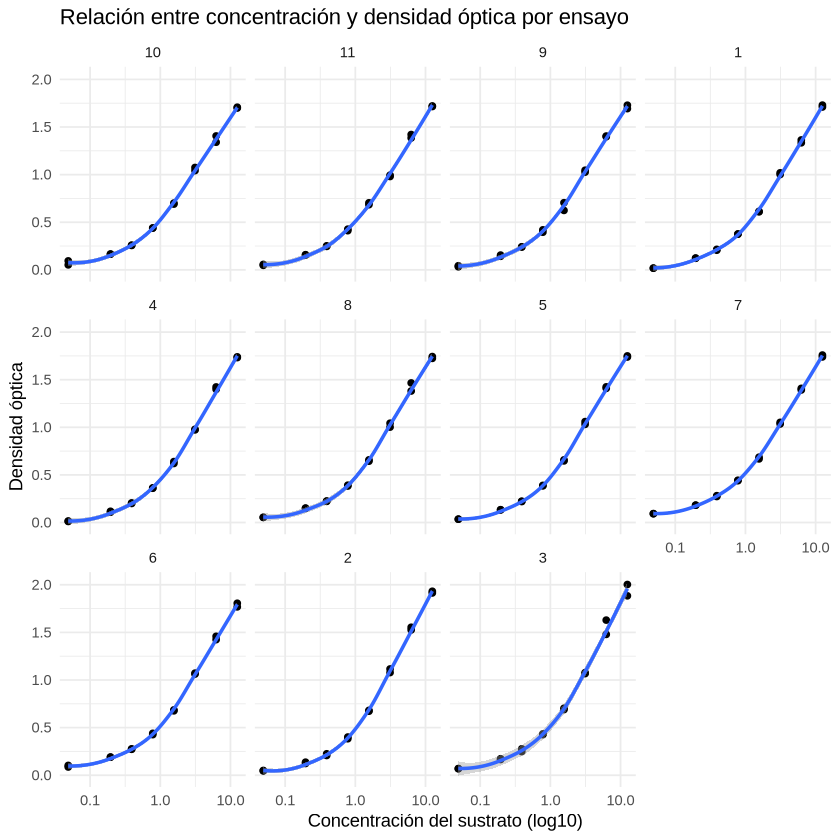

In [33]:
# Gráfico con facetas
ggplot(DNase,
aes(x = conc, y = density)) + 
geom_point() +
geom_smooth(method = "loess", se = TRUE) +
  scale_x_log10() +
  facet_wrap(~Run) +
  labs(
    title = "Relación entre concentración y densidad óptica por ensayo",
    x = "Concentración del sustrato (log10)",
    y = "Densidad óptica"
  ) +
  theme_minimal()


### `geom_bar()`

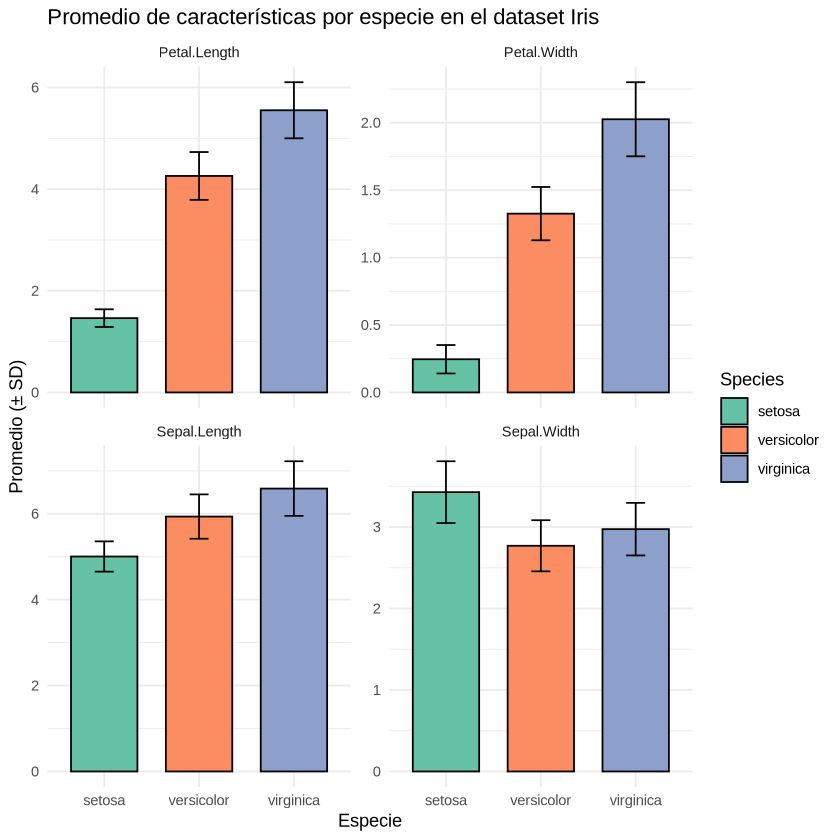

In [26]:
library("dplyr")
library("tidyr")

# Antes transformamos el dataset iris al formato largo (long format)
iris_long <- iris %>%
  pivot_longer(
    cols = starts_with("Sepal") | starts_with("Petal"),
    names_to = "Feature",
    values_to = "Value"
  )

# Calculamos los estadísticos para el promedio y la desviación estándar
iris_summary <- iris_long %>%
  group_by(Species, Feature) %>%
  summarise(
    mean_value = mean(Value),
    sd_value = sd(Value),
    .groups = "drop"
  )


# Gráfico
ggplot(iris_summary, aes(x = Species, y = mean_sepal_length, fill = Species)) +
  geom_bar(stat = "identity", color = "black", width = 0.7) +  # Barras
  geom_errorbar(
    aes(ymin = mean_sepal_length - sd_sepal_length, ymax = mean_sepal_length + sd_sepal_length),
    width = 0.2,
    color = "black"
  ) +
  labs(
    title = "Promedio del largo del sépalo por especie",
    x = "Especie",
    y = "Largo promedio del sépalo (cm)"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2")  # Paleta de colores

### `geom_hist()`

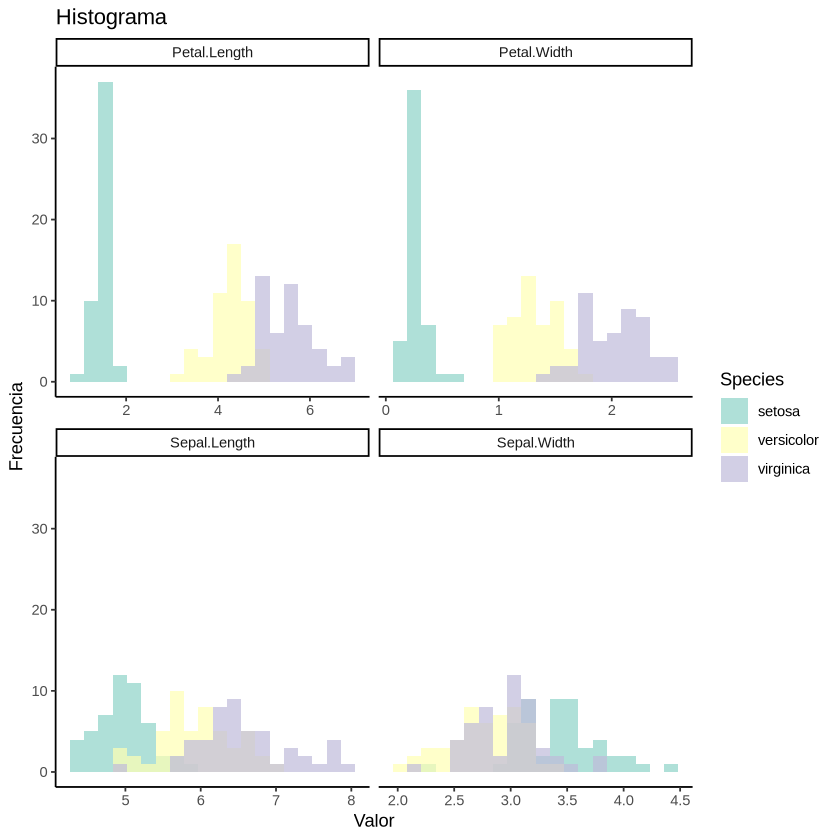

In [31]:
ggplot(iris_long, 
aes(x = Value, fill = Species)) +
geom_histogram(
  position = "identity", 
  alpha = 0.7, bins = 20) +
facet_wrap(~ Feature, 
 scales = "free_x") +
labs(title = "Histogramas de Iris",
  x = "Valor", y = "Frecuencia") +
theme_classic() +
scale_fill_brewer(palette = "Set3")

### `geom_density()`

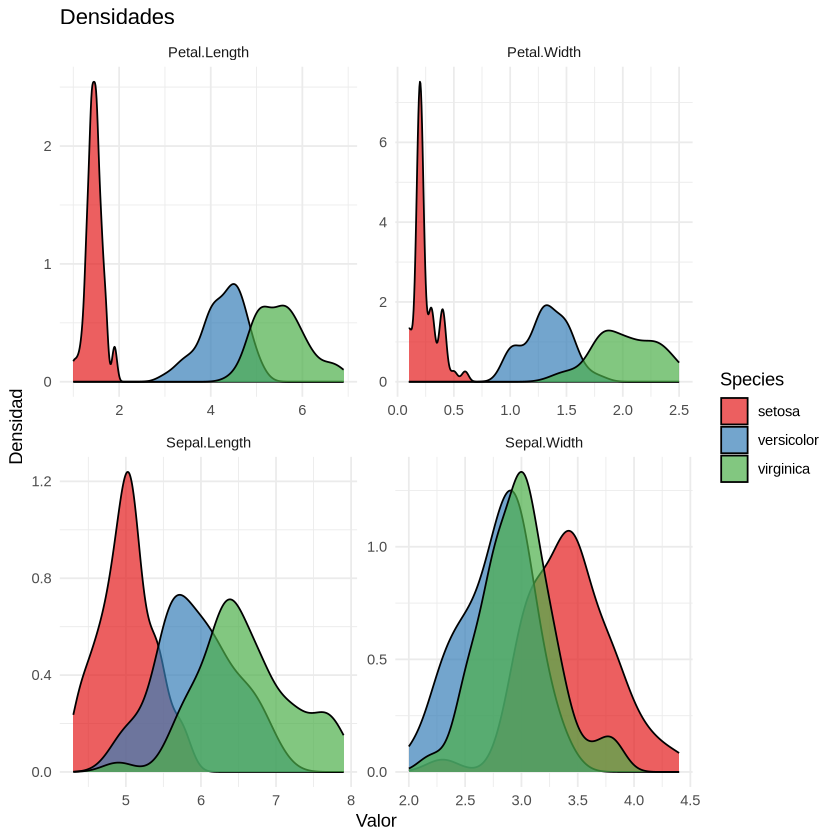

In [36]:
ggplot(iris_long, aes(x = Value, fill = Species)) + geom_density(alpha = 0.7) + facet_wrap(~ Feature, scales = "free") + 
labs(title = "Densidades", x = "Valor", y = "Densidad") + theme_minimal() + scale_fill_brewer(palette = "Set1")

### Conjunto de `geom_boxplot()` y `geom_violin()`

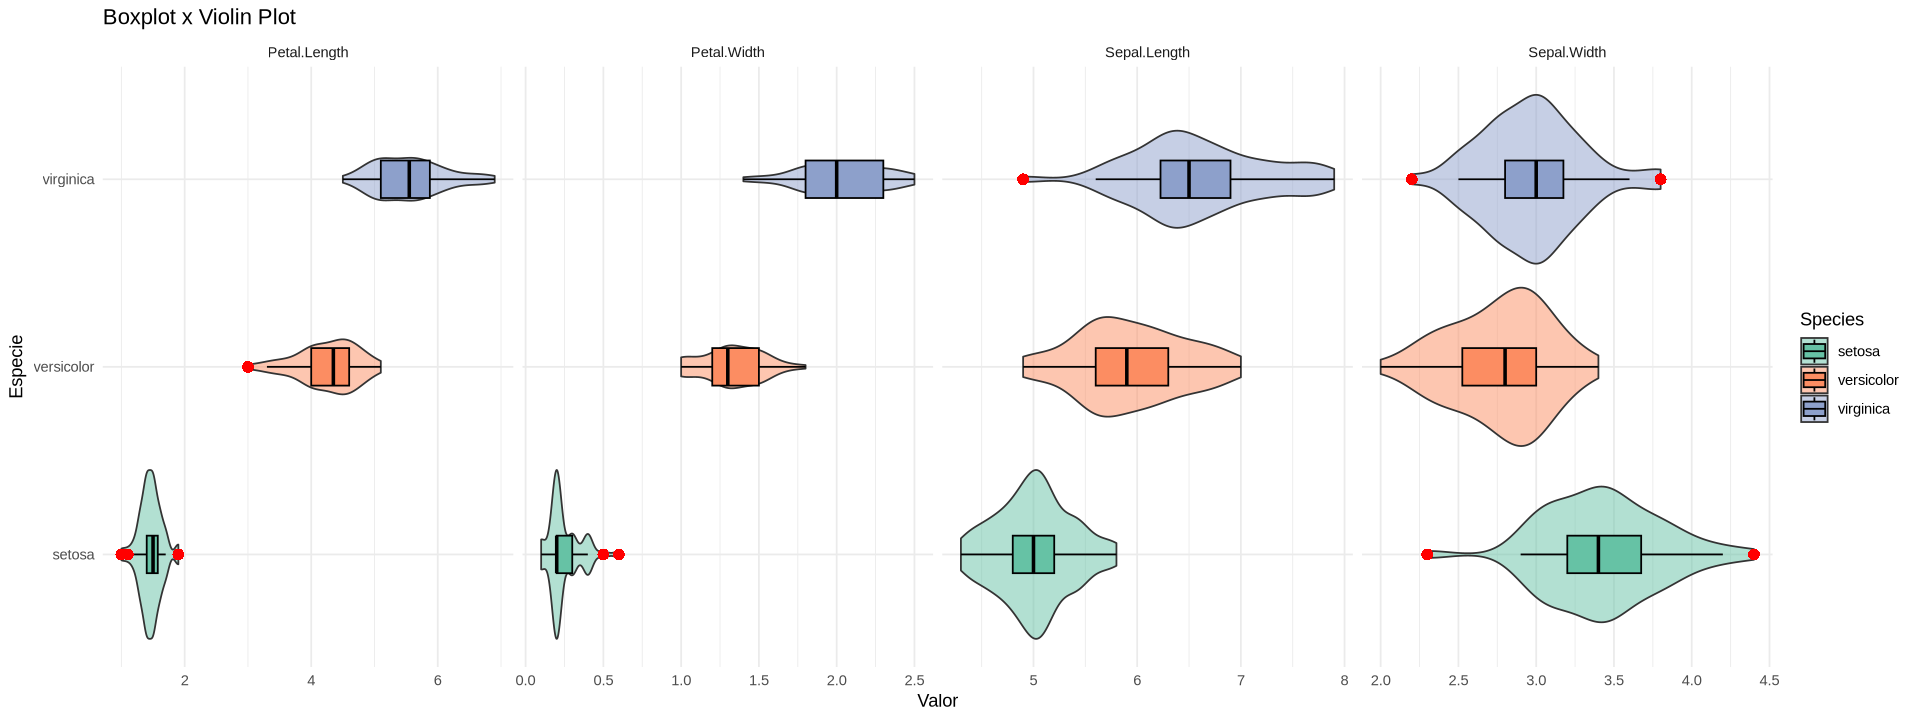

In [41]:
options(repr.plot.width=16, repr.plot.height=6) # Modificamos opciones de salida

ggplot(iris_long, aes(x = Species, y = Value, fill = Species)) +
  geom_violin(alpha = 0.5) +  # Actua similar al de densidad
  geom_boxplot(width = 0.2, color = "black",
    outlier.shape = 16, outlier.colour = "red", outlier.size = 3) +
  facet_wrap(~ Feature, scales = "free_x", ncol = 4) + coord_flip() +
  labs( title = "Boxplot x Violin Plot", x = "Especie", y = "Valor") +
  theme_minimal() + scale_fill_brewer(palette = "Set2")


### Conjunto de `geom_boxplot()` y `geom_jitter()`

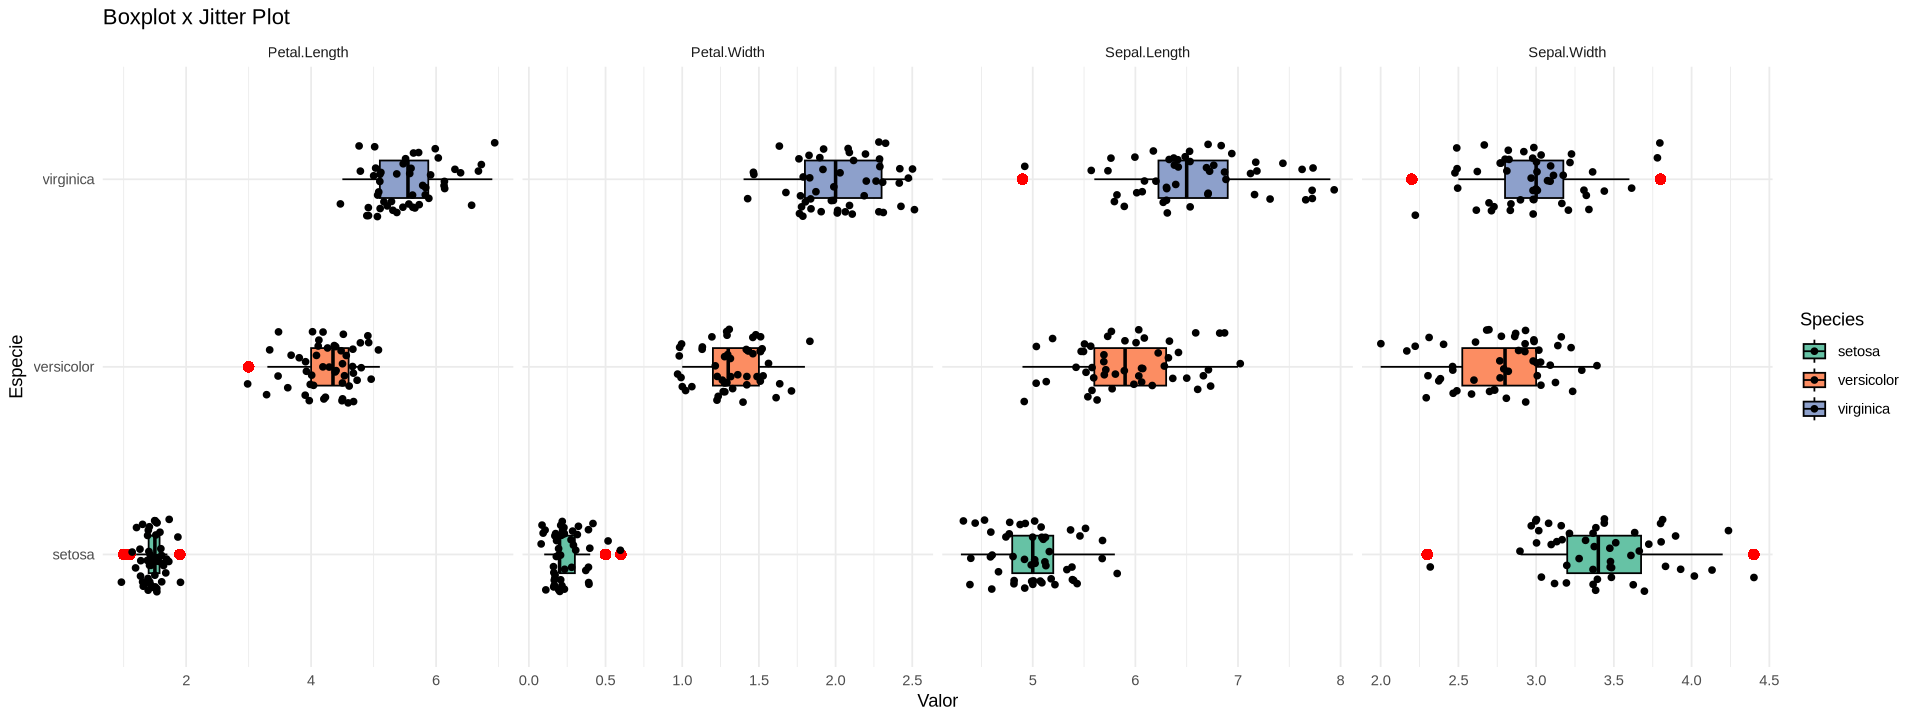

In [53]:
# Una buena alternativa a usar violin
options(repr.plot.width=16, repr.plot.height=6) # Modificamos opciones de salida

ggplot(iris_long, aes(x = Species, y = Value, fill = Species)) +
  geom_boxplot(width = 0.2, color = "black",
    outlier.shape = 16, outlier.colour = "red", outlier.size = 3) +
  geom_jitter(position = position_jitter(0.2)) +
  facet_wrap(~ Feature, scales = "free_x", ncol = 4) + coord_flip() +
  labs( title = "Boxplot x Jitter Plot", x = "Especie", y = "Valor") +
  theme_minimal() + scale_fill_brewer(palette = "Set2")



### `geom_tile()`

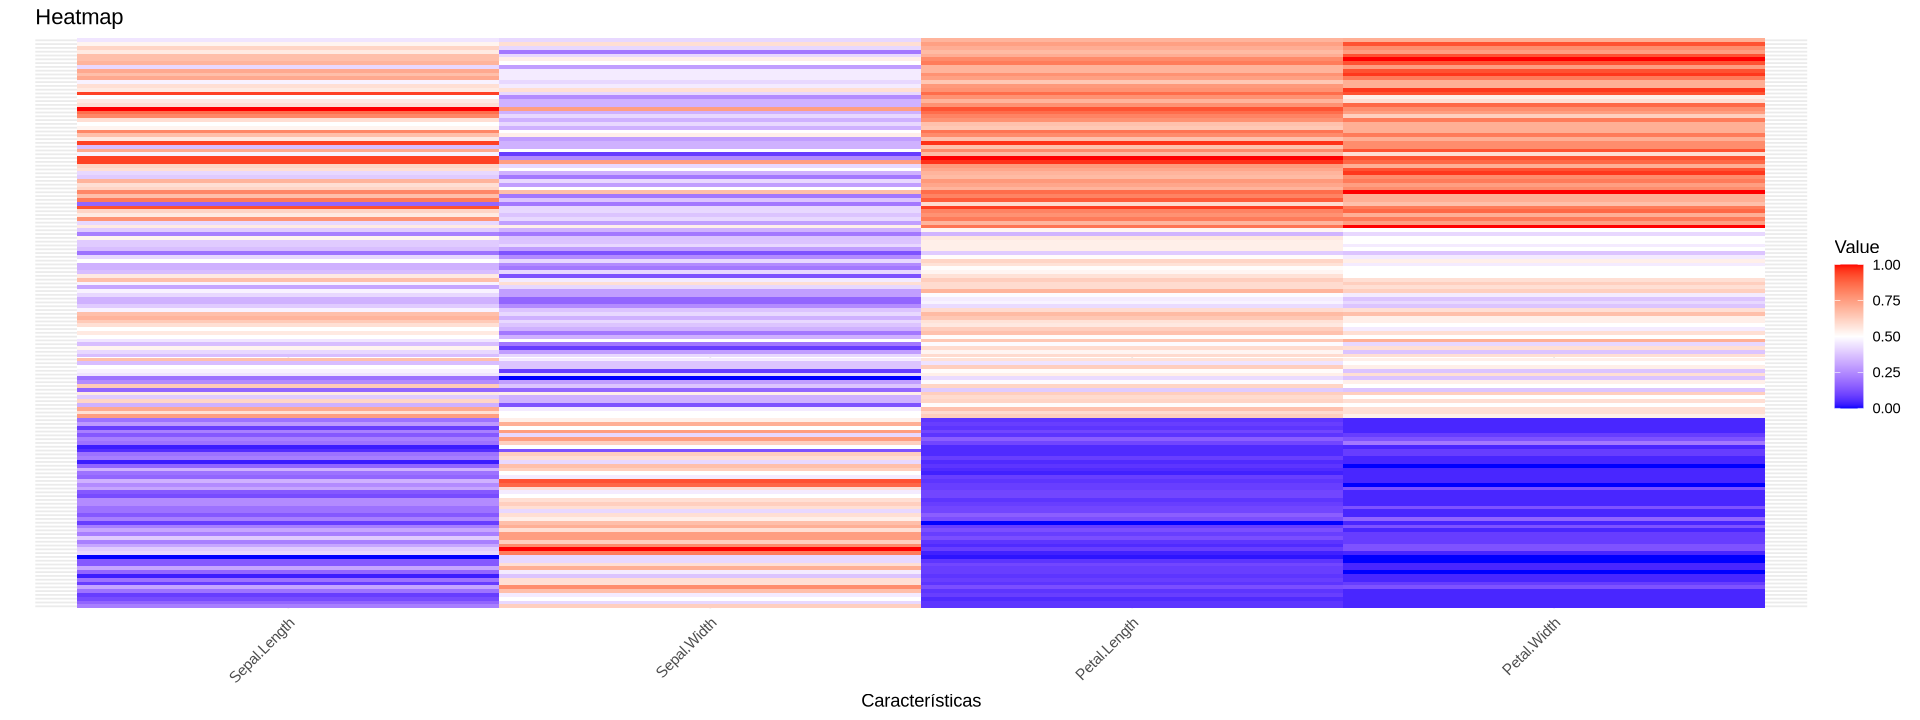

In [88]:
# Generamos una matrix independiente de la label
ma <- as.matrix(iris[, 1:4])
row.names(ma) <- row.names(iris)

# Reconvertimos a df en formato largo
ma_long <- as.data.frame(as.table(ma))
colnames(ma_long) <- c("Species", "Variable", "Value")

# Normalizamos los valores por las características para que los valores sean relativos al rango de cada característica
ma_long <- ma_long %>%
  group_by(Variable) %>%
  mutate(Value = (Value - min(Value)) / (max(Value) - min(Value)))

ggplot(ma_long, aes(x = Variable, y = Species, fill = Value)) + geom_tile() + scale_fill_gradient2(low = "blue",
 high = "red", mid = "white", midpoint = 0.5) + theme_minimal() + theme(axis.text.x = element_text(angle = 45, 
 hjust = 1), axis.text.y = element_blank()) + labs(title = "Heatmap", x = "Características", y = "")

### Alternativa: `pheatmap`

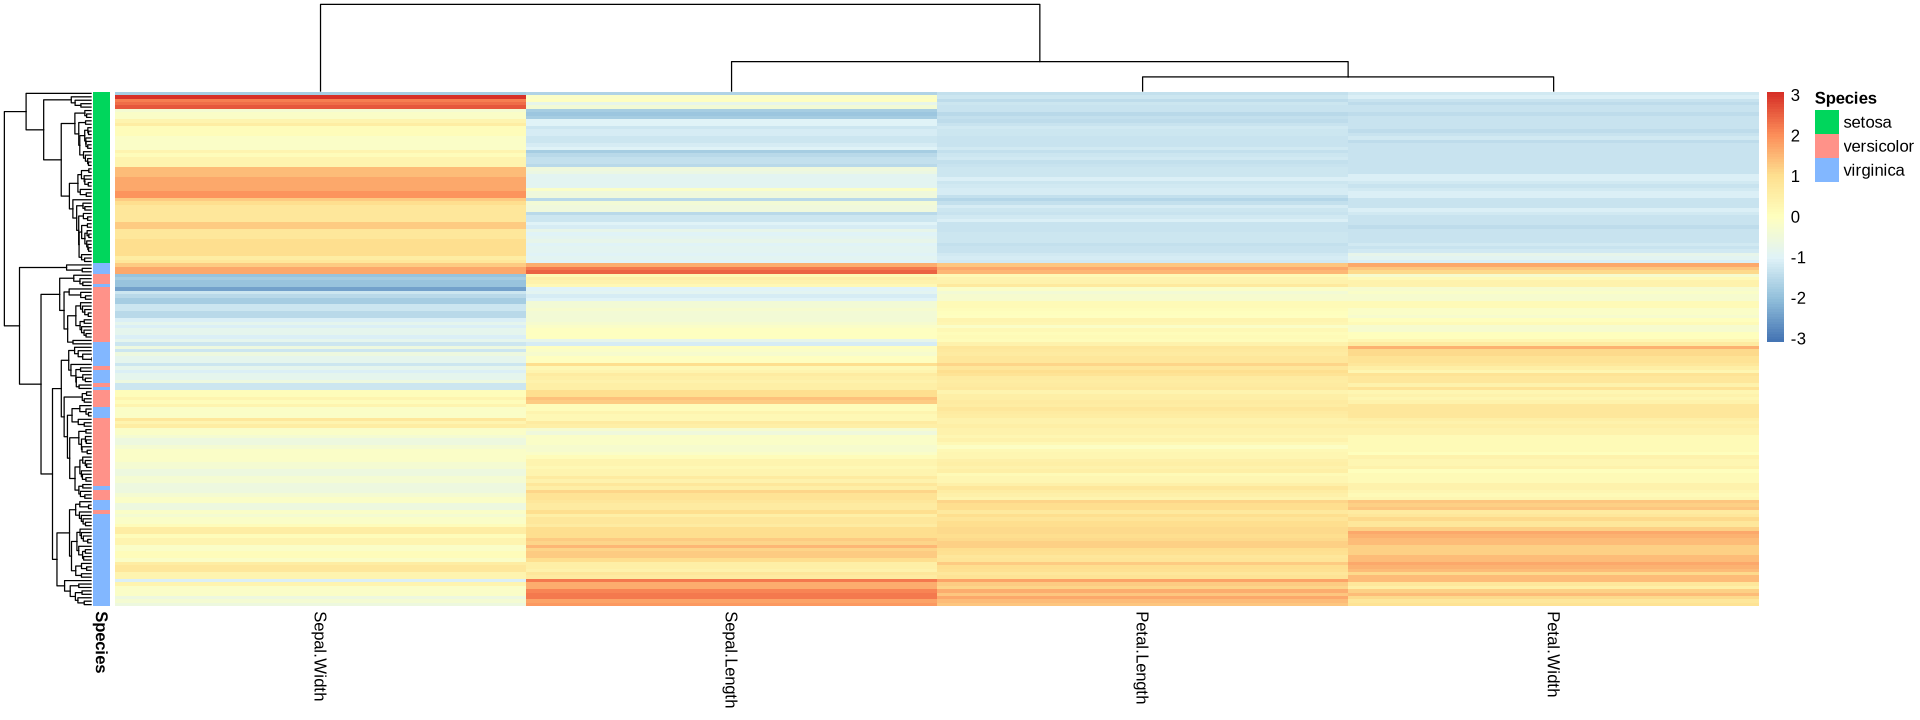

In [87]:
library("pheatmap")
ma <- as.matrix(iris[, 1:4]) # Valores numericos a normalizar
row.names(ma) <- row.names(iris) # Asignamos la clase
pheatmap(ma,
  scale = "column",
  clustering_method = "average", # average linkage
  # cluster_rows = FALSE,  cluster_cols = FALSE,  # Sin agrupar
  annotation_row = iris[, 5, drop = FALSE],
  show_rownames = FALSE
)

<h2> Practica con datos reales </h2>

El cáncer es un grupo de enfermedades que involucran un crecimiento celular anómalo con el potencial de invadir o diseminarse a otras partes del cuerpo. En el núcleo de la etiología del cáncer están las mutaciones somáticas: alteraciones permanentes en el material genético (ya sea como resultado de errores espontáneos durante la replicación del ADN o debido a daños en el ADN) originadas a lo largo del desarrollo somático (desde las primeras divisiones mitóticas del cigoto hasta los tejidos adultos humanos).

A medida que las tecnologías de secuenciación avanzaron en la última década, el número de genomas completos de tumores disponibles ha aumentado exponencialmente, revelando que los diferentes tumores acumulan mutaciones con una variabilidad de hasta tres órdenes de magnitud.

<!-- Agregar una línea vacía aquí -->

![ICGC TMB](ICGC_muts.png)

<!-- Agregar una línea vacía aquí -->

No solo varía el número total de mutaciones, sino también su composición. Los procesos mutacionales endógenos activos en un tejido, así como los mutágenos a los que una persona ha estado expuesta durante su vida, como la luz ultravioleta (UV) o el tabaquismo, definen un conjunto de probabilidades para que cada nucleótido mute, dependiendo de su secuencia vecina. Estas probabilidades pueden ser descompuestas a partir de los datos observados en varios componentes que reflejan aproximadamente los procesos mutacionales individuales que afectan a la célula, las llamadas 'firmas mutacionales', algunas vinculadas a mecanismos específicos.

<!-- Agregar una línea vacía aquí -->

<!-- Agregar una línea vacía aquí -->

**Firma relacionada con el tabaco de sustituciones de bases simples (SBS) 4**

<!-- Agregar una línea vacía aquí -->

[![Tobacco Signature](https://cog.sanger.ac.uk/cosmic-signatures-production/images/v2_signature_profile_4.original.png)](https://cancer.sanger.ac.uk/signatures/signatures_v2/)

<!-- Agregar una línea vacía aquí -->

<!-- Agregar una línea vacía aquí -->

**Firma relacionada con la luz ultravioleta de sustituciones de bases simples (SBS) 7**

<!-- Agregar una línea vacía aquí -->

[![Tobacco Signature](https://cog.sanger.ac.uk/cosmic-signatures-production/images/v2_signature_profile_7.original.png)](https://cancer.sanger.ac.uk/signatures/signatures_v2/)

<!-- Agregar una línea vacía aquí -->

<!-- Agregar una línea vacía aquí -->

Por lo tanto, el estudio de las mutaciones dentro del campo de la Genómica del Cáncer, integrado con otros datos -ómicos como la transcriptómica o la epigenómica, así como los datos clínicos, ha impulsado los últimos avances en la investigación del cáncer.


In [89]:
signatures_df = pd.read_csv('data/SA_COMPOSITE_SNV.activity.FULL_SET.031918.txt', sep='\t', header='infer')
signatures_df

# We can get the tumor mutation burden to do some exploratory analysis
TMB_proxy = signatures_df.iloc[:, 1:].sum(axis=0)
TMB_proxy

# Process the first column to extract SBS code
signatures_df['Unnamed: 0'] = signatures_df['Unnamed: 0'].str.extract(r'_(SBS\w+)_')

# Change column names: the first is signature and the rest are the specimenID
signatures_df.columns = ['signature'] + [col.split('__')[-1] for col in signatures_df.columns[1:]]

# Save the information for later uses
signatures_df.to_csv(path.join('data' , 'signatures.tsv.gz'), sep='\t', index=False, compression='gzip')

# Now, going back to the TMB value
specimen_IDs = [col.split('__')[-1] for col in TMB_proxy.index]
Histological_type = [col.split('__')[0] for col in TMB_proxy.index]

# Generate de novo pandas dataframe with the info
TMB_df = pd.DataFrame({'specimenID': specimen_IDs, 'hist_type': Histological_type, 'TMB_proxy': TMB_proxy.values})
TMB_df

# First set the signature name as the index (row name)
signatures_df = signatures_df.set_index('signature')

# Normalize the values in each column to generate the proportions of each signature
signatures_df = signatures_df.div(signatures_df.sum(axis=0), axis=1)

# Traspose and reorganize index to have as columns (independent variables) each signature
signatures_df = signatures_df.transpose().reset_index()

# Some signatures that were extracted at the start of the cancer genomics field were subdivided into more components
# (7 was subdivided into 7a, 7b and 7c while 17 into 17a and 17b). To simplify we will merge into one component.
# Create new columns by summing the specified columns
signatures_df['SBS7a'] = signatures_df[['SBS7a', 'SBS7b', 'SBS7c']].sum(axis=1)
signatures_df['SBS17a'] = signatures_df[['SBS17a', 'SBS17b']].sum(axis=1)
# Rename the columns ('index' column to 'specimenID' and the others)
signatures_df = signatures_df.rename(columns={'index': 'specimenID', 
                                              'SBS7a': 'SBS7', 
                                              'SBS17a': 'SBS17',
                                              'SBS10a': 'SBS10'})
# Drop the original columns
signatures_df = signatures_df.drop(['SBS7b', 'SBS7c', 'SBS17b'], axis=1)

# Drop signatures with no contribution across specimens 
sum_over = signatures_df[signatures_df.columns[1:]].sum(axis=0)
signatures_df = signatures_df.drop(columns=list(sum_over[sum_over==0].index))

# Convert TMB_proxy to logarithmic scale
TMB_df['log_TMB_proxy'] = np.log10(TMB_df['TMB_proxy'])

# Include the total number of elements in the hist_type label for the plots
TMB_df['hist_type'] = TMB_df['hist_type'] + ' (n=' + TMB_df.groupby('hist_type').transform('count')['specimenID'].astype(str) + ')'

# Merge the two dataframes
merged_df = pd.merge(signatures_df, TMB_df , left_on='specimenID', right_on='specimenID', how='inner')
merged_df


# Get the plotting order of hist_type by increasing median in log TMB
order = TMB_df.groupby('hist_type')['log_TMB_proxy'].median().sort_values().index

# Create a figure and axes
plt.figure(figsize=(10, 40))

# Create a violin plot with a boxplot inside
ax = sns.violinplot(y='hist_type', x='log_TMB_proxy', data=merged_df, order=order, inner='box')

# Set X-axis label
ax.set_xlabel('log(TMB_proxy)')

# Set Y-axis label
ax.set_ylabel('Hist Type')

# Save the figure for future uses
plt.savefig(path.join('plots', 'Violin.png'))
plt.show()

ERROR: Error in pd.read_csv("data/SA_COMPOSITE_SNV.activity.FULL_SET.031918.txt", : could not find function "pd.read_csv"


In [ ]:
from matplotlib.colors import ListedColormap

# Get only relevant columns
prop_df = merged_df[merged_df.columns[:-2]].set_index('specimenID')

# Create subplots
fig, axes = plt.subplots(nrows=len(order), ncols=1, figsize=(5, 5 * len(order)))

# Iterate over hist_type
for i, hist_type in enumerate(order):    

    # Plot the stacked bar plot on the right side
    ax_bar = axes[i]
    sub_prop_df = prop_df[prop_df['hist_type']==hist_type].copy()
    sub_prop_df = sub_prop_df.drop(columns=['hist_type'])

    # Step 1: Drop signatures that do not contribute to the class or less than 1% mean across samples
    mean_over = sub_prop_df[sub_prop_df.columns].mean(axis=0)
    sub_prop_df = sub_prop_df.drop(columns=list(mean_over[mean_over<0.01].index))

    # Step 2: Identify and sort columns by contribution
    contribution_columns = sub_prop_df.iloc[:, :-1].sum().sort_values(ascending=False).index

    # Step 3: Sort rows (specimens) by total contribution of selected SBS columns
    sorted_specimens = sub_prop_df.sort_values(by=list(contribution_columns), ascending=False)

    # Automatically generate a ListedColormap with unique colors based on the number of labels
    num_colors = len(contribution_columns)
    color_map = plt.get_cmap('tab20', num_colors)

    # Step 4: Plot the stacked bar plot
    stacked_bar = sorted_specimens.plot(kind='bar', stacked=True, colormap=color_map, edgecolor='none', width=1, ax=ax_bar)
    ax_bar.set_xlabel('Specimen')
    ax_bar.set_ylabel('Contribution')
    # Remove X-axis tick labels
    ax_bar.set_xticklabels([])  
    ax_bar.set_title(f'Stacked Bar Plot - {hist_type}')
    
    # Move the legend to the right
    ax_bar.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Save the figure for future uses
plt.savefig(path.join('plots', 'Barplot_signatures.png'))
plt.show()